In [1]:
import pandas as pd
import geopandas as gpd


file_path = r"E:\2024\06\90006\data\Car\path_to_output_file.geojson"

gdf = gpd.read_file(file_path)

print(gdf.head())


    ACCIDENT_NO ACCIDENT_DATE ACCIDENT_TIME                  ACCIDENT_TYPE  \
0  T20200000008      20200101        023000         Collision with vehicle   
1  T20200000010      20200101        020000         Collision with vehicle   
2  T20200000016      20200101        003000  Collision with a fixed object   
3  T20200000019      20200101        083200         Collision with vehicle   
4  T20200000024      20200101        094200         Collision with vehicle   

  DAY_OF_WEEK                                          DCA_CODE  \
0   Wednesday                                     RIGHT THROUGH   
1   Wednesday                                     RIGHT THROUGH   
2   Wednesday  RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE   
3   Wednesday                    LEFT NEAR (INTERSECTIONS ONLY)   
4   Wednesday                 CROSS TRAFFIC(INTERSECTIONS ONLY)   

         LIGHT_CONDITION POLICE_ATTEND        ROAD_GEOMETRY  \
0  Dark Street lights on           Yes   Cross intersection   
1 

In [4]:
print(gdf.columns)


Index(['ACCIDENT_NO', 'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ACCIDENT_TYPE',
       'DAY_OF_WEEK', 'DCA_CODE', 'LIGHT_CONDITION', 'POLICE_ATTEND',
       'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE', 'RUN_OFFROAD', 'NODE_ID',
       'NODE_TYPE', 'LGA_NAME', 'LATITUDE', 'LONGITUDE', 'VICGRID_X',
       'VICGRID_Y', 'TOTAL_PERSONS', 'INJ_OR_FATAL', 'FATALITY',
       'SERIOUSINJURY', 'OTHERINJURY', 'NONINJURED', 'MALES', 'FEMALES',
       'BICYCLIST', 'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION',
       'MOTORCYCLIST', 'UNKNOWN', 'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18',
       'OLD_PED_65_AND_OVER', 'OLD_DRIVER_75_AND_OVER', 'YOUNG_DRIVER_18_25',
       'NO_OF_VEHICLES', 'HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE',
       'PT_VEHICLE', 'DEG_URBAN_NAME', 'SRNS', 'RMA', 'DIVIDED',
       'STAT_DIV_NAME', 'date', 'year', 'month', 'day', 'geometry'],
      dtype='object')


c:\Users\30997\AppData\Local\Programs\Python\Python311\Lib\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


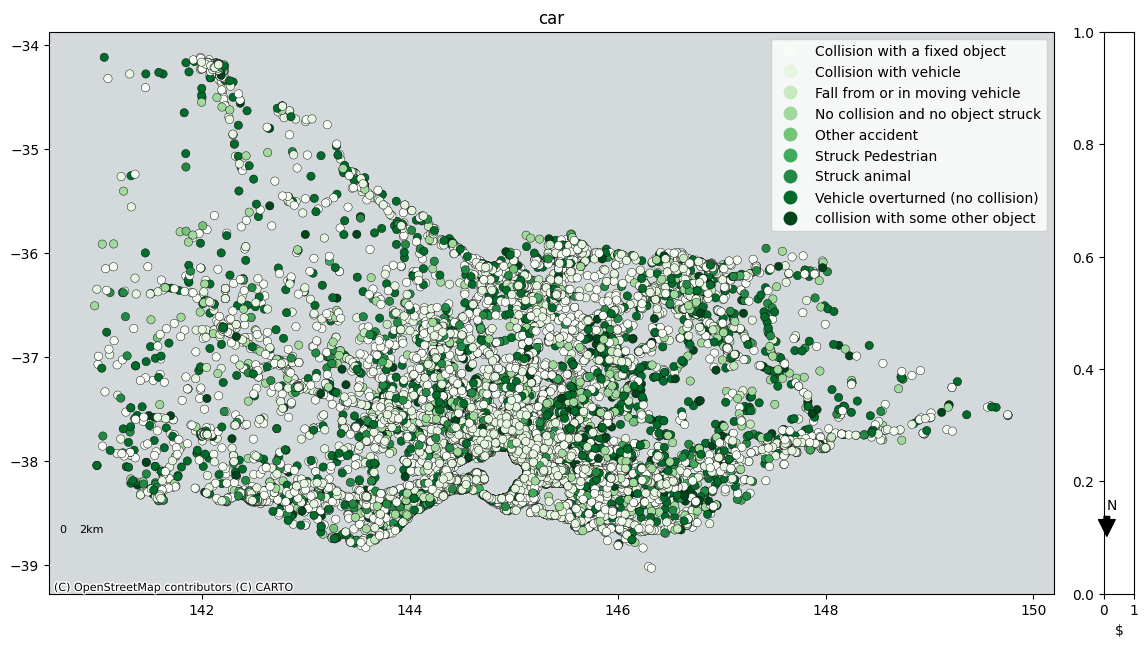

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

fig, ax = plt.subplots(1, 1, figsize=(14, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.5)

gdf.plot(column='ACCIDENT_TYPE', 
                            cmap='Greens',
                            edgecolor="k",  
                            linewidth=0.3, 
                            ax=ax, 
                            legend=True,
                            cax=cax)

ax.set_title("car")
cax.set_xlabel('$', loc='center', fontsize = 10)

plt.annotate('N', xy=(0.1, 0.1), xytext=(0.1, 0.15),
             arrowprops=dict(facecolor='black', shrink=0.05),
             xycoords='axes fraction')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)


plt.text(0.01, 0.105, '0', transform=ax.transAxes, fontsize=8, verticalalignment='bottom')
plt.text(0.03, 0.105, '2km', transform=ax.transAxes, fontsize=8, verticalalignment='bottom')

plt.show()


In [40]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
file_path1 = r"E:\2024\06_4\90006\data\Car\Greater Melbourne (ABS) study area.shp"
vic = gpd.read_file(file_path1)
gdf = gdf.to_crs(vic.crs)
clipped_gdf = gpd.overlay(gdf, vic, how='intersection')


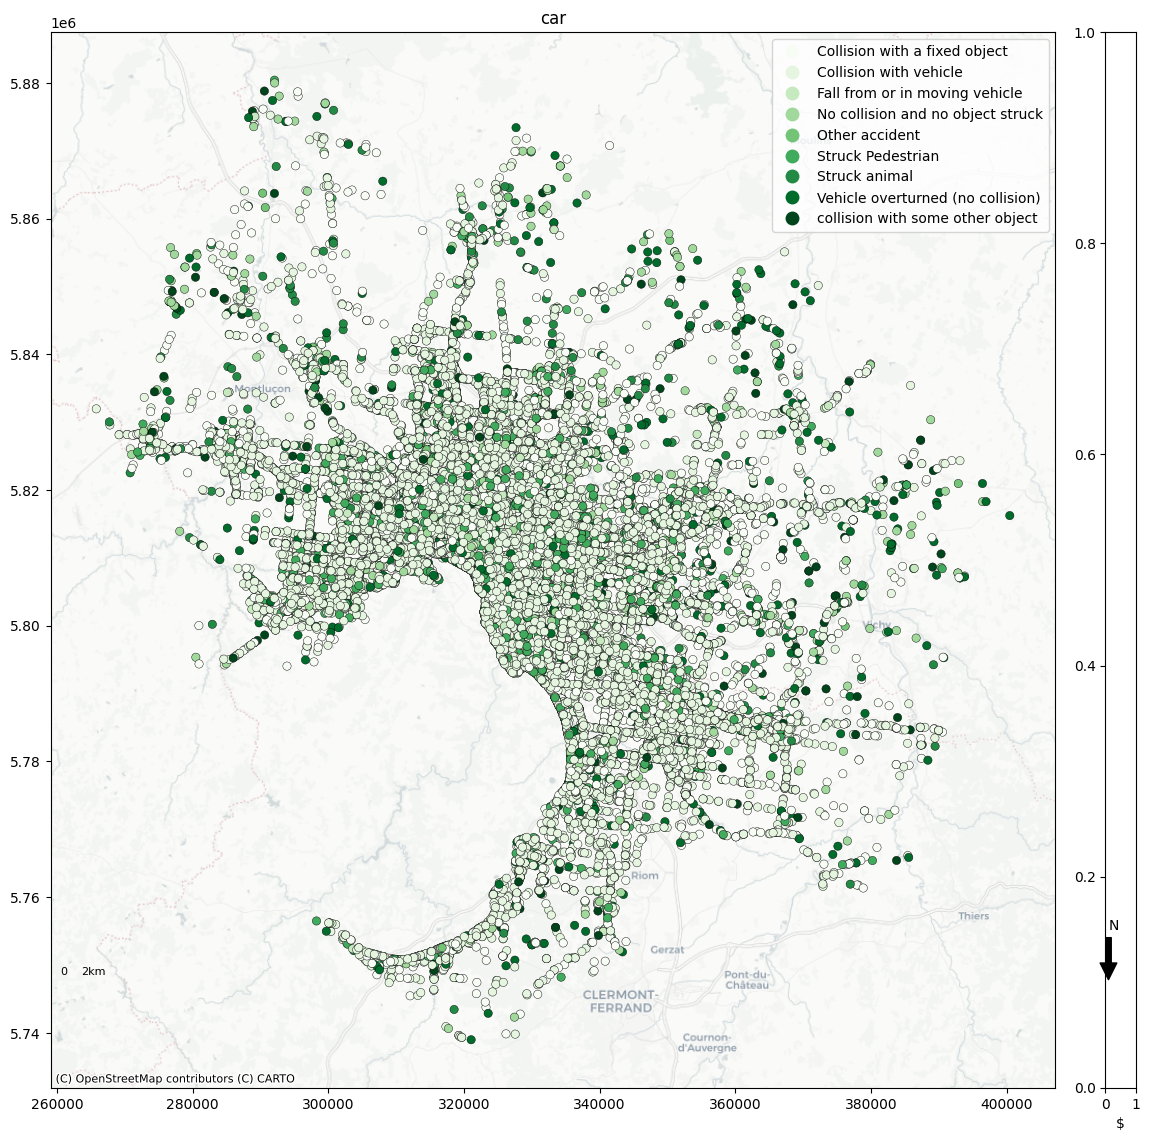

In [44]:


fig, ax = plt.subplots(1, 1, figsize=(14, 14))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.5)
clipped_gdf.plot(column='ACCIDENT_TYPE', 
                            cmap='Greens',
                            edgecolor="k",  
                            linewidth=0.3, 
                            ax=ax, 
                            legend=True,
                            cax=cax)

ax.set_title("car")
cax.set_xlabel('$', loc='center', fontsize = 10)

plt.annotate('N', xy=(0.1, 0.1), xytext=(0.1, 0.15),
             arrowprops=dict(facecolor='black', shrink=0.05),
             xycoords='axes fraction')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)


plt.text(0.01, 0.105, '0', transform=ax.transAxes, fontsize=8, verticalalignment='bottom')
plt.text(0.03, 0.105, '2km', transform=ax.transAxes, fontsize=8, verticalalignment='bottom')

plt.show()


In [45]:
clipped_gdf.head()

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,LIGHT_CONDITION,POLICE_ATTEND,ROAD_GEOMETRY,SEVERITY,...,RMA,DIVIDED,STAT_DIV_NAME,date,year,month,day,GCCSA_CODE,GCCSA_NAME,geometry
0,T20200000008,20200101,023000,Collision with vehicle,Wednesday,RIGHT THROUGH,Dark Street lights on,Yes,Cross intersection,Other injury accident,...,Arterial Other,Divided,Metro,2020-01-01,2020,1,1,2GMEL,Greater Melbourne,POINT (335344.443 5790074.741)
1,T20200000010,20200101,020000,Collision with vehicle,Wednesday,RIGHT THROUGH,Dark Street lights on,Yes,Not at intersection,Fatal accident,...,Arterial Other,Divided,Metro,2020-01-01,2020,1,1,2GMEL,Greater Melbourne,POINT (316293.076 5826818.190)
2,T20200000016,20200101,003000,Collision with a fixed object,Wednesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,Dark Street lights on,Yes,T intersection,Serious injury accident,...,Local Road,Undivided,Metro,2020-01-01,2020,1,1,2GMEL,Greater Melbourne,POINT (334804.187 5815588.061)
3,T20200000019,20200101,083200,Collision with vehicle,Wednesday,LEFT NEAR (INTERSECTIONS ONLY),Day,Yes,Cross intersection,Other injury accident,...,Arterial Other,Undivided,Metro,2020-01-01,2020,1,1,2GMEL,Greater Melbourne,POINT (326203.122 5817856.878)
4,T20200000027,20200101,112900,Collision with vehicle,Wednesday,ENTERING PARKING,Day,Yes,T intersection,Serious injury accident,...,Local Road,Undivided,Metro,2020-01-01,2020,1,1,2GMEL,Greater Melbourne,POINT (320413.238 5810708.383)
